# Working with surveillance videos, captioning frames, and indoor/outdoor detection

This notebook is a tutorial of fastdup beta advanced capabilities. Please sign up for a free version at info@visual-layer.com to unlock those and many other functionalities.


## Download Dataset
Download the fight detection surveilance camera dataset

In [1]:
!git clone https://github.com/seymanurakti/fight-detection-surv-dataset.git

Cloning into 'fight-detection-surv-dataset'...
remote: Enumerating objects: 340, done.
remote: Total 340 (delta 0), reused 0 (delta 0), pack-reused 340
Receiving objects: 100% (340/340), 84.35 MiB | 10.88 MiB/s, done.
Resolving deltas: 100% (11/11), done.


## Installation & Setting Up

In [ ]:
!pip install pip -U
!pip install fastdup transformers

In [ ]:
from IPython.display import Image
import fastdup
!mkdir frames
fastdup.extract_video_frames('fight-detection-surv-dataset/fight/', 'frames/fight')
fastdup.extract_video_frames('fight-detection-surv-dataset/noFight/', 'frames/no-fight')


## Quick preview of video frames

In [16]:
fight_files=!find frames/fight/ -name '*.jpg'
no_fight_files=!find frames/no-fight/ -name '*.jpg'

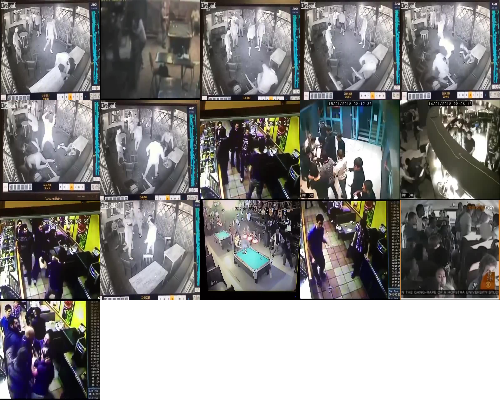

In [17]:
ret = fastdup.generate_sprite_image(fight_files, 55, ".")[0]
from IPython.display import Image
Image(filename=ret)
                              

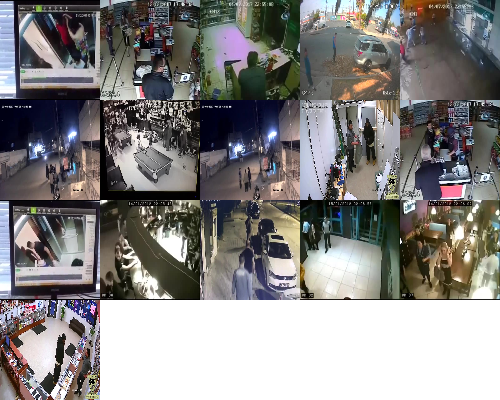

In [18]:
ret = fastdup.generate_sprite_image(no_fight_files, 55, ".")[0]
Image(filename=ret)

## Build fastdup model

In [19]:
# Cluster similar frames together
fd = fastdup.create(input_dir='frames', work_dir='out_frames')
fd.run(overwrite=True)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-04-24 11:50:00 [INFO] Going to loop over dir frames
2023-04-24 11:50:00 [INFO] Found total 32 images to run on, 32 train, 0 test, name list 32, counter 32 
2023-04-24 11:50:01 [INFO] Found total 32 images to run on
Finished histogram 0.051
Finished bucket sort 0.068
2023-04-24 11:50:01 [INFO] 2) Finished write_index() NN model
2023-04-24 11:50:01 [INFO] Stored nn model index file out_frames/nnf.index
2023-04-24 11:50:01 [INFO] Total time took 1007 ms
2023-04-24 11:50:01 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 %
2023-04-24 11:50:01 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 %
2023-04-24 11:50:01 [INFO] Found a total of 16 above threshold images (d>0.900), which are 16.67 %
2023-04-24 11:50:01 [INFO] Found a total of 3 outlier images         (d<0.050), which are 3.12 %
2023-04-24 11:50:01 [INFO] Min distance found 0.635 max distance 0.969
2023

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 163.72it/s]

Finished OK. Components are stored as image files out_frames/galleries/components_[index].jpg
Stored components visual view in  out_frames/galleries/components.html
Execution time in seconds 0.0



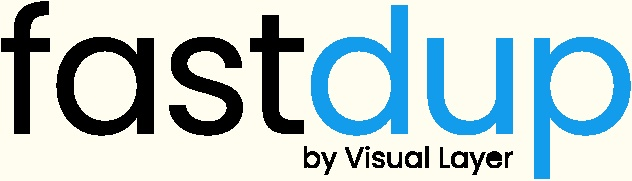
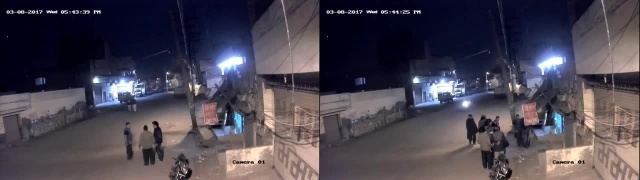

In [20]:
fd.vis.component_gallery(num_images=10)

## Caption images automatically

/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|                                                                          | 0/2 [00:00<?, ?it/s]/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 5652.70it/s]

Stored outliers visual view in  out_frames/galleries/outliers.html



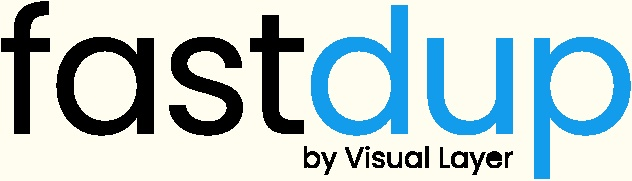
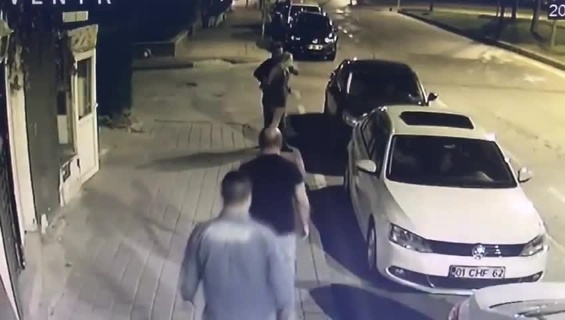
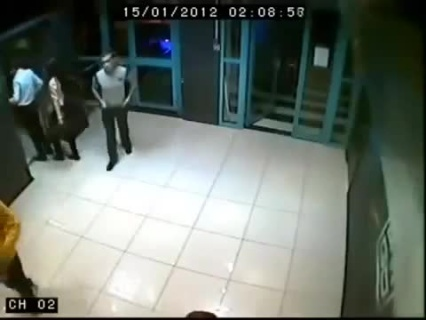

In [21]:
fd.vis.outliers_gallery(num_images=10, label_col='automatic2')

In the above reports the captions are given under the "label" field name

## Indoors/outdoors Detection
Let's now classify if the frames belong to indoor or outdoor scene.

100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7710.12it/s]


Stored outliers visual view in  out_frames/galleries/outliers.html



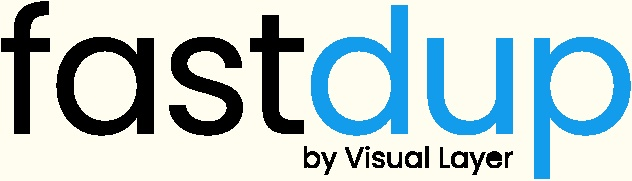
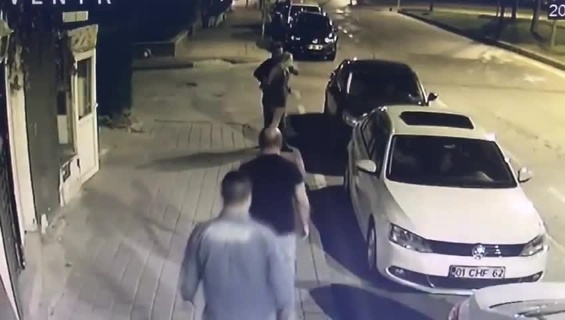
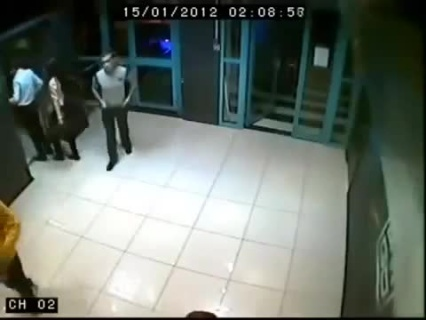

In [23]:
fd.vis.outliers_gallery(num_images=10, label_col='indoors_outdoors')

As can be seen the indoors/outdoors classifier is 90% correct on the above example